# Predicción: campeón copa mundial. 

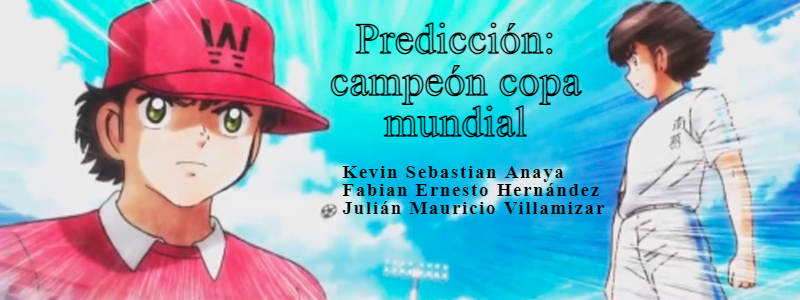

## Autores


*   Kevin Sebastian Anaya Herrera
*   Fabian Ernesto Hernández Ramírez
*   Julian Mauricio Villamizar Anaya



## Objetivo

Crear una aproximación de lo que puede ser el resultado de un encuentro de futbol o inclusive conocer cual de los participantes del torneo tiene mas probabilidades de ser el campeón. 

## Contexto

La Copa Mundial de la FIFA es el torneo de fútbol más prestigioso del mundo. El campeonato se ha otorgado cada cuatro años desde el inicio del torneo en 1930.

El formato actual implica una fase de clasificación, que tiene lugar durante los tres años anteriores, para determinar qué equipos califican para el torneo. En el torneo, 32 equipos, incluido el país anfitrión, compiten por el título en diferentes estadios del país anfitrión.

El actual campeón es Francia, que venció a Croacia en el torneo de 2018 en Rusia. Qatar albergará el torneo de 2022, cuyo primer partido se jugará en noviembre.

Este conjunto de datos proporciona una descripción completa de todos los partidos de fútbol internacionales jugados desde los años 90. Además de eso, la fuerza de cada equipo se proporciona mediante la incorporación de clasificaciones reales de FIFA, así como las fortalezas de los jugadores basadas en el videojuego EA Sport FIFA.

In [1]:
# Importar librerias necesarias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/dataset_proyecto/international_matches.csv", sep=',')
df.tail() #Ver ultimas 5 lineas 

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


## DATOS 

In [5]:
#Resumen

df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [6]:
#Ver columnas 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 


*   **date** : Fecha del partido
*   **home_team** : Equipo local
*   **away_team** : Equipo visitante
*   **home_team_continent** : Continente del equipo local
*   **away_team_continent** : Continente del equipo visitante
*   **home_team_fifa_rank** : El ranking FIFA del equipo local en el momento del partido
*   **away_team_fifa_rank** : El ranking FIFA del equipo visitante en el momento del partido
*   **home_team_total_fifa_points** : El número total de puntos FIFA del equipo local en el momento del partido.
*   **away_team_total_fifa_points** : El número total de puntos FIFA del equipo visitante en el momento del partido.
*   **home_team_score** : Puntuación del equipo local a tiempo completo, incluida la prórroga, sin incluir las tandas de penaltis
*   **away_team_score** : Puntuación del equipo visitante a tiempo completo, incluida la prórroga, sin incluir las tandas de penaltis
*   **tournament** : torneo/competición
*   **city** : ciudad donde se jugó el partido
*   **country** : país donde se jugó el partido
*   **neutral_location** : Columna VERDADERO/FALSO que indica si el partido se jugó en un lugar neutral
*   **shoot_out** : Columna VERDADERO/Falso que indica si el partido incluyó una tanda de penaltis
*   **home_team_result** : Resultado del partido del equipo local, incluidas las tandas de penaltis (WIN / LOSE)
*   **home_team_goalkeeper_score** : Puntuación del juego FIFA del portero mejor clasificado del equipo local
*   **away_team_goalkeeper_score** : Puntuación del juego FIFA del portero mejor clasificado del equipo visitante
*   **home_team_mean_defense_score** : Promedio de puntaje de juego de FIFA de los 4 jugadores defensivos mejor clasificados del equipo local
*   **home_team_mean_offense_score** : Puntuación media de los partidos de FIFA de los 4 centrocampistas mejor clasificados del equipo local
*   **home_team_mean_midfield_score** : Puntaje promedio de juego de FIFA de los 3 jugadores atacantes mejor clasificados del equipo local, incluidos los jugadores laterales
*   **away_team_mean_defense_score** : Promedio de puntaje de juego de FIFA de los 4 jugadores defensivos mejor clasificados del equipo visitante
*   **away_team_mean_offense_score** : Puntuación media de los partidos de FIFA de los 4 centrocampistas mejor clasificados del equipo visitante
*   **away_team_mean_midfield_score** : Puntaje promedio de juego de FIFA de los 3 jugadores atacantes mejor clasificados del equipo visitante, incluidos los jugadores laterales
















## EQUIPOS PARTICIPANTES 

In [7]:
#Equipos clasificados a la copa del mundo
fifa2022_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                  'England', 'IR Iran', 'USA', 'Wales',
                  'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                  'France', 'Australia', 'Denmark', 'Tunisia',
                  'Spain', 'Costa Rica', 'Germany', 'Japan',
                  'Belgium', 'Canada', 'Morocco', 'Croatia',
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [8]:
equiposParticipantes = []
for x in fifa2022_teams:
    rank_df = df[(df['home_team']== x) | (df['away_team']== x)].sort_values(['date','home_team_fifa_rank','away_team_fifa_rank'], ascending=[False,True,True]).iloc[0]
    if rank_df['home_team']==x:
        rank = rank_df['home_team_fifa_rank']
    else:
        rank = rank_df['away_team_fifa_rank']
    equiposParticipantes.append(rank)

team_ranks = pd.DataFrame({'Team':fifa2022_teams, 'Rank': equiposParticipantes}).sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1
team_ranks

,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


## TOP 10 FIFA RANKING

La FIFA actualiza la clasificación de los equipos varias veces al año en función del rendimiento del equipo en los partidos. Cada equipo recibe una cierta cantidad de puntos en función de si ganó o empató, la importancia del partido y la fuerza del equipo contrario. El número total de puntos determina el rango FIFA del equipo.

Si queremos saber la clasificación más reciente del equipo, debemos centrarnos en el partido más reciente que jugó cada equipo...



In [10]:
#Agrupación de datos en categorias visitante/local y renombramiento
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
'away_team_total_fifa_points','home_team_total_fifa_points']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank','home_team_total_fifa_points' : 'rank_points' })
away = fifa_rank[['date', 'away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank','away_team_total_fifa_points' : 'rank_points' })
fifa_rank = home.append(away)

#Seleccionar para cada país su último partido
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'rank')
#fifa_points_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nlargest(10, 'rank_points') 

#top 10
fifa_rank_top

,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


![brazil](https://imgsrv2.voi.id/RqYn-NI4KErKeA_ily96qZVR5107o7Wxngd057bCmDA/auto/1200/675/sm/1/bG9jYWw6Ly8vcHVibGlzaGVycy8xODYxNDAvMjAyMjA3MDQxMzQwLW1vYmlsZS5jcm9wcGVkXzE2NTY5MTY4NDguanBn.jpg)

## TOP 10 OFENSIVO

In [11]:
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)

#último partido que jugó cada país
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top_data = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'offense_score')
offense_top_data

,date,team,offense_score
23741,2022-06-05,Argentina,89.0
23885,2022-06-13,France,88.3
23906,2022-06-14,England,88.0
23760,2022-06-06,Brazil,86.3
23867,2022-06-12,Portugal,86.0
23909,2022-06-14,Belgium,85.7
23907,2022-06-14,Italy,85.3
23866,2022-06-12,Spain,85.0
23909,2022-06-14,Poland,84.7
23862,2022-06-11,Uruguay,84.3


![argentina](https://www.telegraph.co.uk/content/dam/world-cup/2022/07/18/TELEMMGLPICT000264060038_trans_NvBQzQNjv4BqPTOlm1dDCBd97IasTB6wuyX5rhseiWKOo9p9OQ-ymek.jpeg)

## TOP 10 DEFENSIVO

Suele decirse que el puesto más importante en el fútbol es el de delantero. Sin el delantero, el equipo marcaría menos goles, lo que reduce las posibilidades de que el equipo gane el partido. ¿Qué equipo tiene la ofensiva más fuerte?

In [12]:
defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = defense [['date', 'home_team','home_team_mean_defense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_defense_score' : 'defense_score'})
away = defense [['date', 'away_team','away_team_mean_defense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_defense_score' : 'defense_score'})
defense  = home.append(away)

#último partido que jugó cada país
defense   = defense .sort_values(['team', 'date'], ascending=[True, False])
defense ['row_number'] = defense .groupby('team').cumcount()+1
defense_top_data = defense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'defense_score')
defense_top_data

,date,team,defense_score
23866,2022-06-12,Spain,86.5
23908,2022-06-14,Netherlands,85.2
23867,2022-06-12,Portugal,85.2
23906,2022-06-14,England,85.0
23760,2022-06-06,Brazil,84.8
23885,2022-06-13,France,84.2
23907,2022-06-14,Italy,84.2
23907,2022-06-14,Germany,84.0
23741,2022-06-05,Argentina,82.2
23879,2022-06-13,Morocco,81.2


![españa](https://static.euronews.com/articles/stories/07/04/09/98/808x573_cmsv2_9fba5e94-4773-5fe8-b674-94fa9363307c-7040998.jpg)

## TOP 10 MEJORES MEDIOCAMPISTAS

In [13]:
midfield = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = midfield [['date', 'home_team','home_team_mean_midfield_score']].rename(columns = {'home_team': 'team', 'home_team_mean_midfield_score' : 'midfield_score'})
away = midfield [['date', 'away_team','away_team_mean_midfield_score']].rename(columns = {'away_team': 'team', 'away_team_mean_midfield_score' : 'midfield_score'})
midfield  = home.append(away)

#último partido que jugó cada país
midfield   = midfield .sort_values(['team', 'date'], ascending=[True, False])
midfield ['row_number'] = defense .groupby('team').cumcount()+1
midfield_top_data = midfield [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'midfield_score')
midfield_top_data

,date,team,midfield_score
23907,2022-06-14,Germany,87.8
23885,2022-06-13,France,86.8
23866,2022-06-12,Spain,86.0
23909,2022-06-14,Belgium,85.5
23760,2022-06-06,Brazil,85.5
23907,2022-06-14,Italy,84.5
23867,2022-06-12,Portugal,84.5
23885,2022-06-13,Croatia,84.2
23741,2022-06-05,Argentina,84.0
23906,2022-06-14,England,84.0


![alemania](https://imgsrv2.voi.id/Wp28m9YosINUMcvx2qIJXVG2tg8qeXIgJaObeHdN1ZU/auto/1200/675/sm/1/bG9jYWw6Ly8vcHVibGlzaGVycy8xODUyNzgvMjAyMjA3MDEwNTU4LW1haW4uY3JvcHBlZF8xNjU2NjI5OTI2LmpwZw.jpg)

## ¿Existe tal cosa como la ventaja del equipo local?

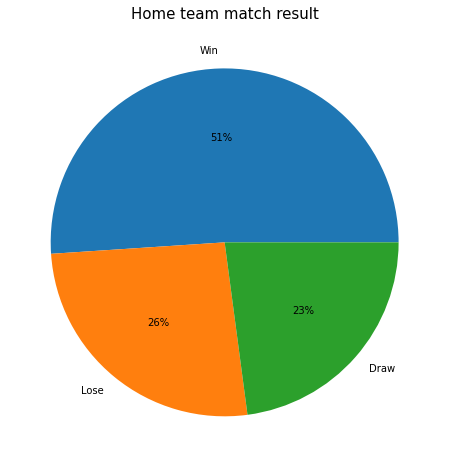

In [14]:
home_team_advantage = df[df['neutral_location']==False]['home_team_result'].value_counts(normalize=True)

#plot
fig, axes = plt.subplots(1,1,  figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Win',  'Lose', 'Draw'], autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()

Un equipo que juega en su propio país claramente tiene muchas más posibilidades de ganar el juego. 

## CORRELACIÓN

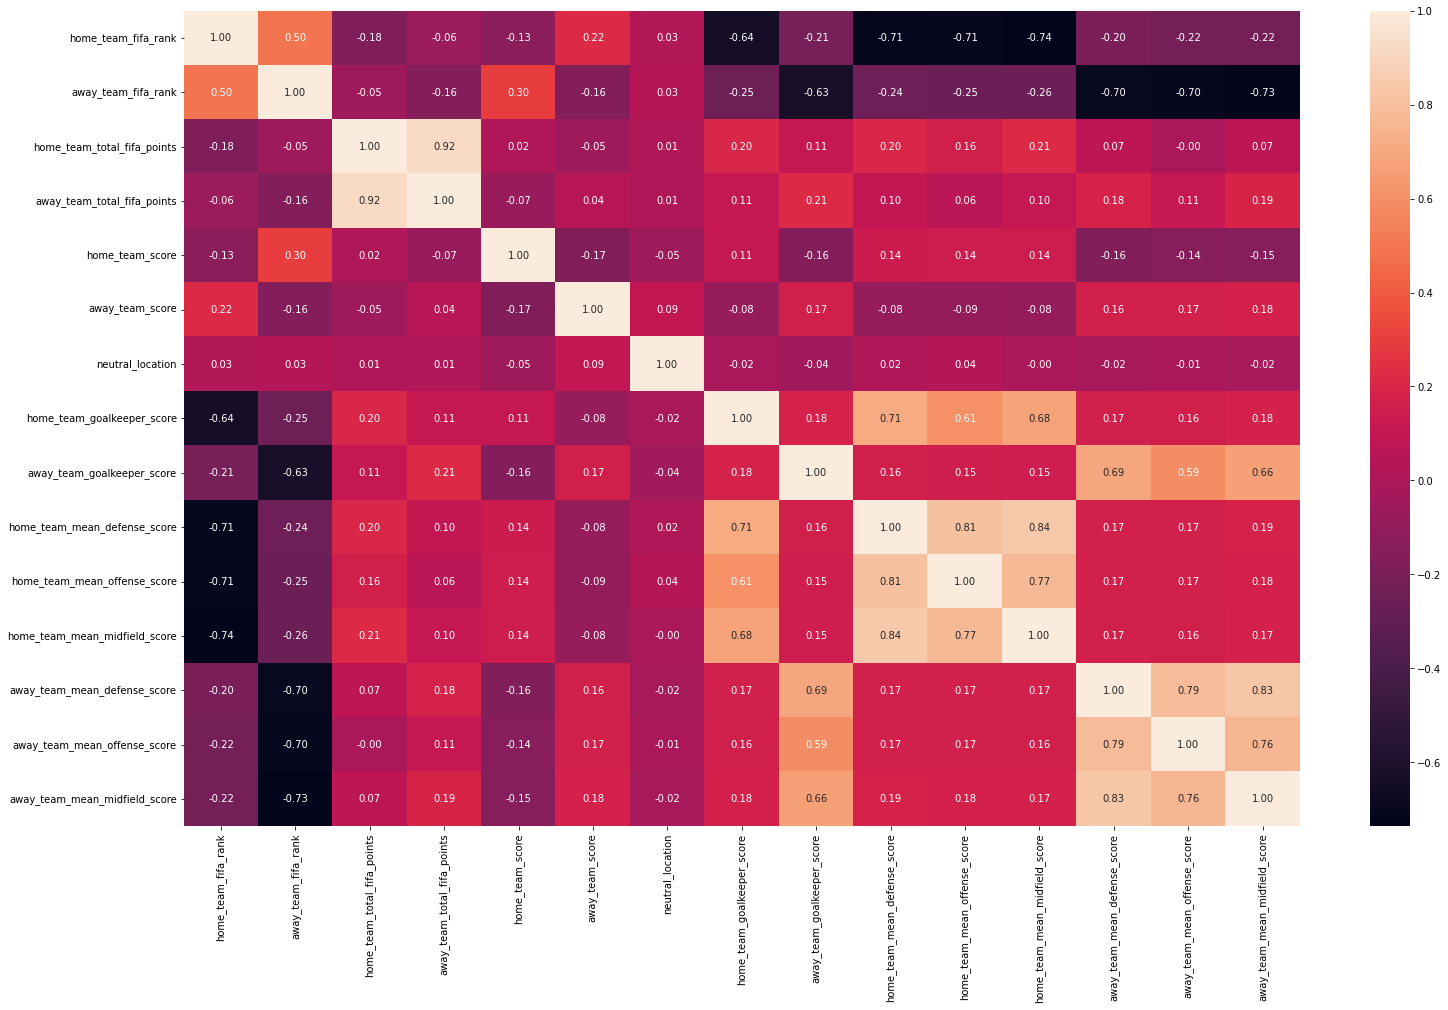

In [15]:
plt.subplots(figsize=(25,15)) #Importante para que se vean todas las correlaciones
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

## PORCENTAJE DE VICTORIAS

In [16]:
hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []
for team in fifa2022_teams:
    home_win = df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
    home_draw = df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
    home_lose = df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]
    
    away_win = df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
    away_draw = df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
    away_lose = df[df['away_team']==team][df['home_team_result']=='Win'].shape[0]  
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)
    
    wins = np.add(hwins,awins)
    draws = np.add(hdraws,adraws)
    loses = np.add(hloses,aloses)

    
win_draw_lose = pd.DataFrame({'Team':fifa2022_teams, 'Win': wins, 'Draw': draws, 'Lose': loses,
                              'Home win': hwins, 'Home draw': hdraws, 'Home lose': hloses,
                              'Away win': awins, 'Away draw': adraws, 'Away lose': aloses})

win_draw_lose.insert(1, 'Total', win_draw_lose['Win']+win_draw_lose['Draw']+win_draw_lose['Lose'])
win_draw_lose.insert(8, 'Total Home', win_draw_lose['Home win']+win_draw_lose['Home draw']+win_draw_lose['Home lose'])
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away win']+win_draw_lose['Away draw']+win_draw_lose['Away lose'])

win_draw_lose['Win %'] = np.around(100*win_draw_lose['Win']/win_draw_lose['Total'], 2)
win_draw_lose['Draw %'] = np.round(100*win_draw_lose['Draw']/win_draw_lose['Total'], 2)
win_draw_lose['Lose %'] = np.round(100*win_draw_lose['Lose']/win_draw_lose['Total'], 2)

win_draw_lose['Home Win %'] = np.round(100*win_draw_lose['Home win']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Draw %'] = np.round(100*win_draw_lose['Home draw']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Lose %'] = np.round(100*win_draw_lose['Home lose']/win_draw_lose['Total Home'], 2)

win_draw_lose['Away Win %'] = np.round(100*win_draw_lose['Away win']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Draw %'] = np.round(100*win_draw_lose['Away draw']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Lose %'] = np.round(100*win_draw_lose['Away lose']/win_draw_lose['Total Away'], 2)
win_draw_lose = win_draw_lose.sort_values('Win %', ascending=False).reset_index(drop=True)
win_draw_lose.index += 1
win_draw_lose.style.set_properties(**{'background-color': 'gray', 'color':'yellow'}, subset=['Home win','Home Win %','Win %'])

<ipython-input-16-d8e7611aad2b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_win = df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
<ipython-input-16-d8e7611aad2b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_draw = df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
<ipython-input-16-d8e7611aad2b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_lose = df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]
<ipython-input-16-d8e7611aad2b>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  away_win = df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
<ipython-input-16-d8e7611aad2b>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  away_draw = df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
<ipython-input-16-d8e7611aad2b>:10: UserWar

,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away draw,Away lose,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,433,301,76,56,181,31,21,233,120,45,35,200,69.520000,17.550000,12.930000,77.680000,13.300000,9.010000,60.000000,22.500000,17.500000
2,Spain,354,246,64,44,145,27,17,189,101,37,27,165,69.490000,18.080000,12.430000,76.720000,14.290000,8.990000,61.210000,22.420000,16.360000
3,France,370,230,83,57,145,44,32,221,85,39,25,149,62.160000,22.430000,15.410000,65.610000,19.910000,14.480000,57.050000,26.170000,16.780000
4,Germany,390,240,82,68,139,44,36,219,101,38,32,171,61.540000,21.030000,17.440000,63.470000,20.090000,16.440000,59.060000,22.220000,18.710000
5,IR Iran,366,217,79,70,133,31,27,191,84,48,43,175,59.290000,21.580000,19.130000,69.630000,16.230000,14.140000,48.000000,27.430000,24.570000
6,Netherlands,340,201,74,65,119,40,33,192,82,34,32,148,59.120000,21.760000,19.120000,61.980000,20.830000,17.190000,55.410000,22.970000,21.620000
7,Portugal,336,198,79,59,123,37,24,184,75,42,35,152,58.930000,23.510000,17.560000,66.850000,20.110000,13.040000,49.340000,27.630000,23.030000
8,Argentina,367,216,79,72,130,36,24,190,86,43,48,177,58.860000,21.530000,19.620000,68.420000,18.950000,12.630000,48.590000,24.290000,27.120000
9,England,334,196,75,63,124,38,32,194,72,37,31,140,58.680000,22.460000,18.860000,63.920000,19.590000,16.490000,51.430000,26.430000,22.140000
10,Croatia,320,172,79,69,92,38,24,154,80,41,45,166,53.750000,24.690000,21.560000,59.740000,24.680000,15.580000,48.190000,24.700000,27.110000


# Seccion de entrenamiento 

In [17]:
# hacemos uso de la libreria sklearn

from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [18]:
# preparamos el dataset y correjimos errores
train_df = pd.read_csv("/content/drive/MyDrive/dataset_proyecto/international_matches.csv", sep=',')
train_df = train_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})
rank_df = rank_df.replace({"IR Iran": "Iran", "Korea Republic" : "South Korea"})


# Separamos las columnas que nos seran utiles para hacer las predicciones
train_df['rank_difference'] = train_df['home_team_fifa_rank'] - train_df['away_team_fifa_rank']
train_df['average_rank'] = (train_df['home_team_fifa_rank'] + train_df['away_team_fifa_rank'])/2
train_df['point_difference'] = train_df['home_team_total_fifa_points'] - train_df['away_team_total_fifa_points']
train_df['is_stake'] = train_df['tournament'] != 'Friendly'
train_df['is_worldcup'] = 'FIFA World Cup' in train_df['tournament']

train_df['score_difference'] = train_df['home_team_score'] - train_df['away_team_score'] # esto no se utiliza en el entrenamiento
train_df['is_won'] = train_df['score_difference'] > 0

# separamos los datos de testeo y de entrenamiento 
X, y = train_df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake', 'is_worldcup']], train_df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21)

**Gaussian Naive Bayes**

In [19]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gnb_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

67.84

In [20]:
est = GaussianNB()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))


0.6783699059561129


**Decision tree**

In [21]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

59.14

In [22]:
est = DecisionTreeClassifier(max_depth=6)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.6777429467084639


**Random forest**

In [23]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

63.51

In [24]:
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.6365726227795193


**Support Vector Classifier**

In [25]:
svc = SVC()
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

67.63

In [26]:
est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.6762800417972832


## SIMULACIÓN

Calcula la diferencia de rango FIFA entre los equipos locales y visitantes, el rango FIFA promedio de ambos equipos, la diferencia de puntos FIFA totales, la diferencia de goles y establece si el equipo local ganó o no. Además, establece si el partido es amistoso o no. Estas características se utilizan posteriormente para entrenar un modelo de regresión logística y evaluar su rendimiento.

In [27]:
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['score_difference'] = df['home_team_score'] - df['away_team_score']
df['is_won'] = df['score_difference'] > 0 # Se toman los empates como derrotas
df['is_stake'] = df['tournament'] != 'Friendly'

## MODELO

El código entrena un modelo de regresión logística para predecir si un equipo de fútbol ganará o no un partido en función de su rango FIFA promedio, la diferencia de rango entre los equipos, y la diferencia de puntos totales de la FIFA entre los equipos. El modelo se entrena en un conjunto de datos de entrenamiento y se evalúa en un conjunto de datos de prueba utilizando la curva ROC y su puntaje.

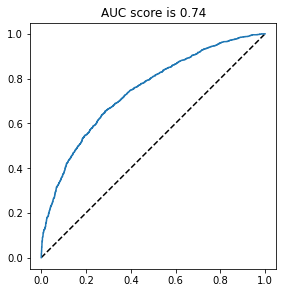

In [28]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# Graficos
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)


In [29]:
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA',
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']

In [30]:
world_cup_rankings_home = df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']].loc[df['home_team'].isin(teams_worldcup) & (df['date']>'2021-01-01')] #Obtener 
world_cup_rankings_away = df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']].loc[df['away_team'].isin(teams_worldcup)& (df['date']>'2021-01-01')]
world_cup_rankings_home = world_cup_rankings_home.set_index(['home_team'])

In [31]:
#La idea es separar el rendimiento de cada equipo como local o visitante.
world_cup_rankings_home = world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away = world_cup_rankings_away.groupby('away_team').mean()

In [32]:
world_cup_rankings_away.head(13)

,away_team_fifa_rank,away_team_total_fifa_points
away_team,,
Argentina,5.875000,1717.500000
Australia,36.428571,1477.571429
Belgium,1.181818,1810.818182
Brazil,1.888889,1810.444444
Cameroon,49.428571,1431.857143
Canada,55.866667,1400.000000
Costa Rica,45.857143,1440.928571
Croatia,15.600000,1607.800000
Denmark,10.500000,1640.000000


In [33]:
world_cup_rankings_away.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'Japan', 'Mexico', 'Morocco', 'Netherlands',
       'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Spain', 'Switzerland', 'Tunisia', 'USA', 'Uruguay', 'Wales'],
      dtype='object', name='away_team')

El siguiente código simula un torneo de la copa del mundo y predice quién podría ser el ganador en base a los datos de los partidos previos.

In [34]:
from tqdm import tqdm #Barra de progreso

simulation_winners = list()
simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16 = list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Simulaciones

for j in tqdm(range(n_simulations)):
    #IMPORTANTE: Tiene que clasificar los equipos en el orden de los pares contra los que podrían enfrentarse a partir de la ronda 16 (es decir, SENEGAL X HOLANDA o FRANCIA x DINAMARCA)
    #De acuerdo a sus resultados iniciales los candidatos son los equipos iniciales que avanzaron a la ronda 16:
    candidates = [ 'Senegal','England','Netherlands','USA', 'Argentina','Australia', 'France', 'Poland','Spain', 'Morocco', 'Japan', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Switzerland']
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # paso de simulación basado en la probabilidad
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        
        if f == 'round_of_16':
            step_16 = ['round_16'] * 8
            candidates_round_16 = zip(step_16, winners, prob)
            df_candidates_round_16 = pd.DataFrame(candidates_round_16, columns = ['Step','Team','Prob'])
            simulation_df_round16.append(df_candidates_round_16)
            simulation_results_round16.append(winners)

        if f == 'quarterfinal':
            step_quarterfinal = ['quarterfinal'] * 4
            candidates_quarterfinal = zip(step_quarterfinal,winners, prob)
            df_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns = ['Step','Team','Prob'])
            simulation_df_quarterfinal.append(df_candidates_quarterfinal)
            simulation_results_quarterfinal.append(winners)

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)

        if f == 'final':    
            step_final = ['final'] * 1
            candidates_final = zip(step_final,winners, prob)
            df_candidates_final = pd.DataFrame(candidates_final, columns = ['Step','Team','Prob'])
            simulation_winners.append(df_candidates_final)
            simulation_results_winners.append(winners)

      
        candidates = winners 

df_candidates_round_16 = pd.concat(simulation_df_round16)
df_candidates_quarterfinal = pd.concat(simulation_df_quarterfinal)
df_candidates_semifinal = pd.concat(simulation_df_semifinal)
df_candidates_final = pd.concat(simulation_winners)

df_results = pd.concat([df_candidates_round_16,df_candidates_quarterfinal,df_candidates_semifinal,df_candidates_final]) #final DataFrame

simulation_results_round16 = sum(simulation_results_round16, [])
simulation_results_quarterfinal = sum(simulation_results_quarterfinal, [])
simulation_results_semifinal = sum(simulation_results_semifinal, [])
simulations_winners = sum(simulation_results_winners, [])

100%|██████████| 1000/1000 [00:46<00:00, 21.50it/s]


Este código simula la ronda final de la Copa del Mundo 2022 de la FIFA utilizando un modelo de clasificación binario de aprendizaje automático y un proceso de simulación basado en probabilidad. Se usa el módulo tqdm para mostrar una barra de progreso durante la simulación.

In [35]:
#Counter se usa para contar fácilmente elementos recurrentes en una lista de verificación
from collections import Counter

Este código utiliza la biblioteca Matplotlib de Python para crear gráficos de barras horizontales que muestran los resultados de una simulación de la Copa del Mundo de Fútbol 2022.

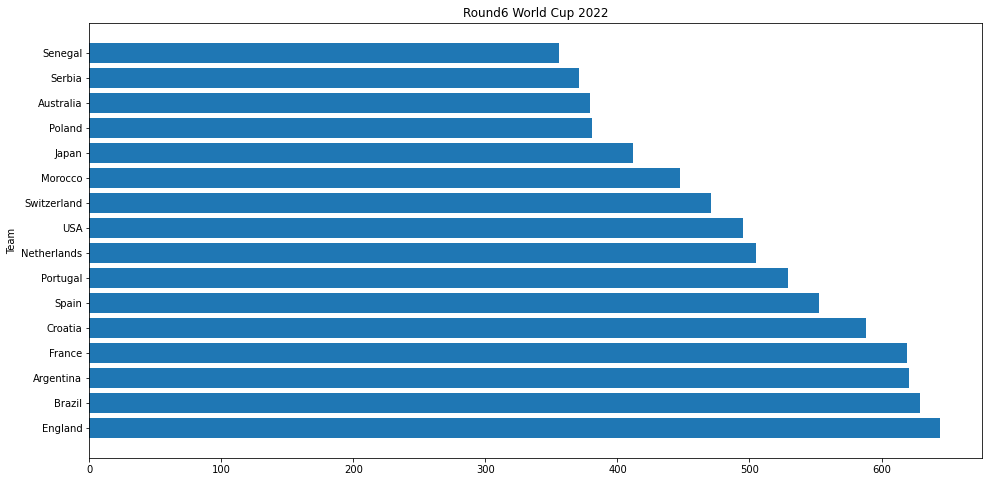

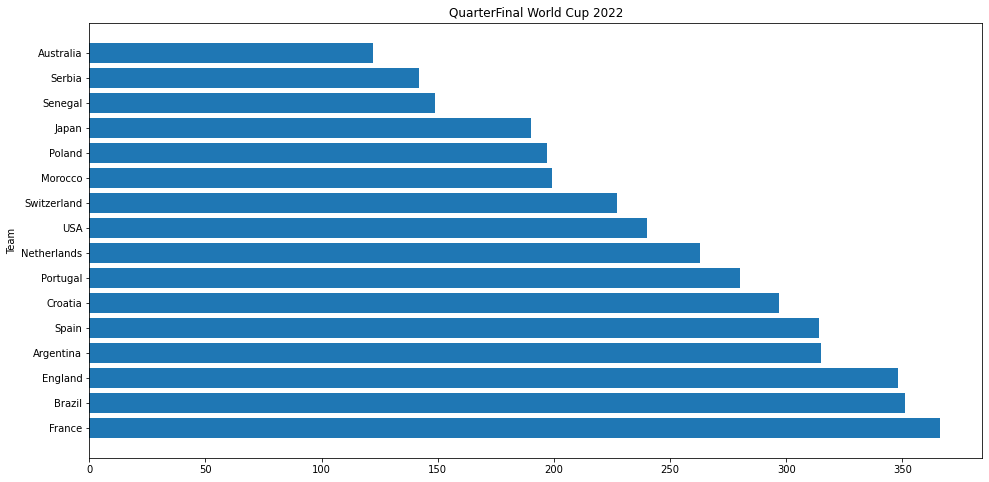

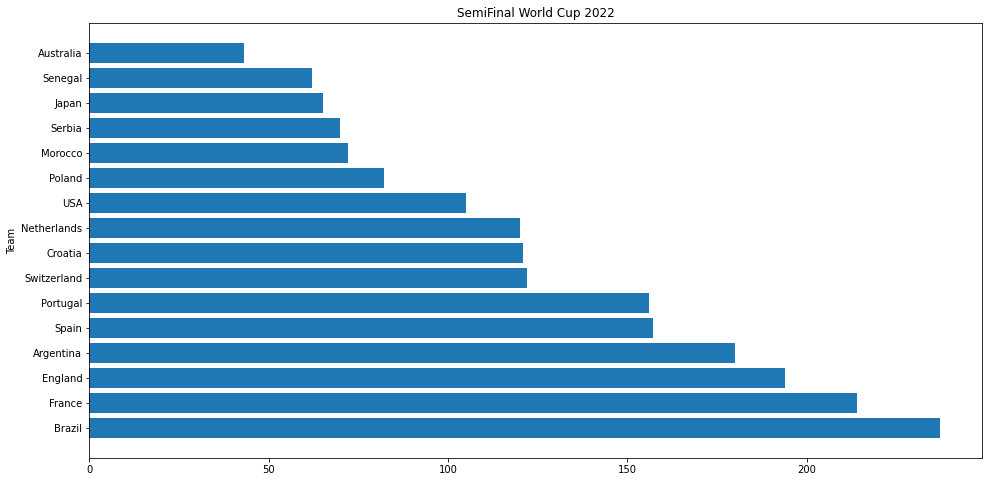

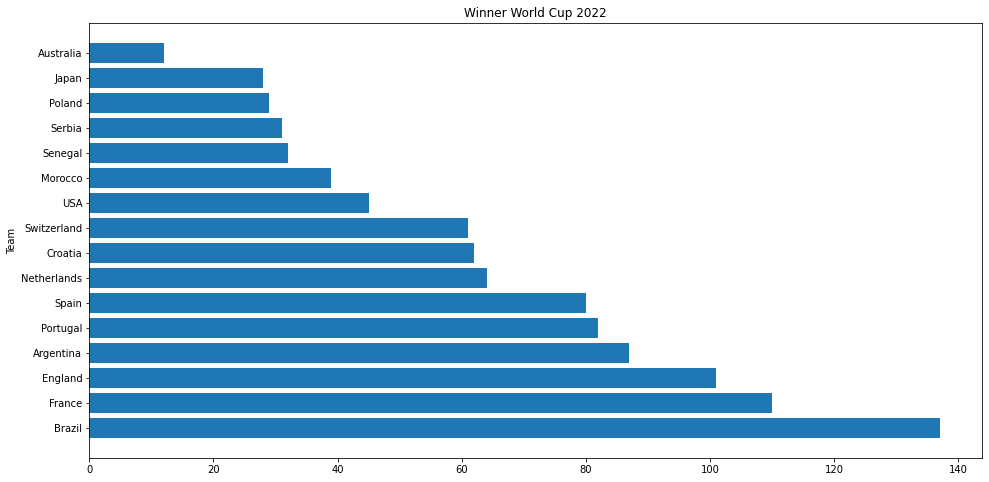

In [36]:
from matplotlib import figure

lst_results = [simulation_results_round16,simulation_results_quarterfinal,simulation_results_semifinal,simulations_winners]
for i in lst_results:
    results = Counter(i).most_common()
    x,y = zip(*results)

    fig,ax = plt.subplots(figsize=(16,8))

    ax.barh(x, y)

    ax.set_ylabel('Team')

    if i == simulation_results_round16:
        ax.set_title('Round6 World Cup 2022')
    if i == simulation_results_quarterfinal:
        ax.set_title('QuarterFinal World Cup 2022')
    if i == simulation_results_semifinal:
        ax.set_title('SemiFinal World Cup 2022')
    if i == simulations_winners:
        ax.set_title('Winner World Cup 2022')

        
    plt.show()

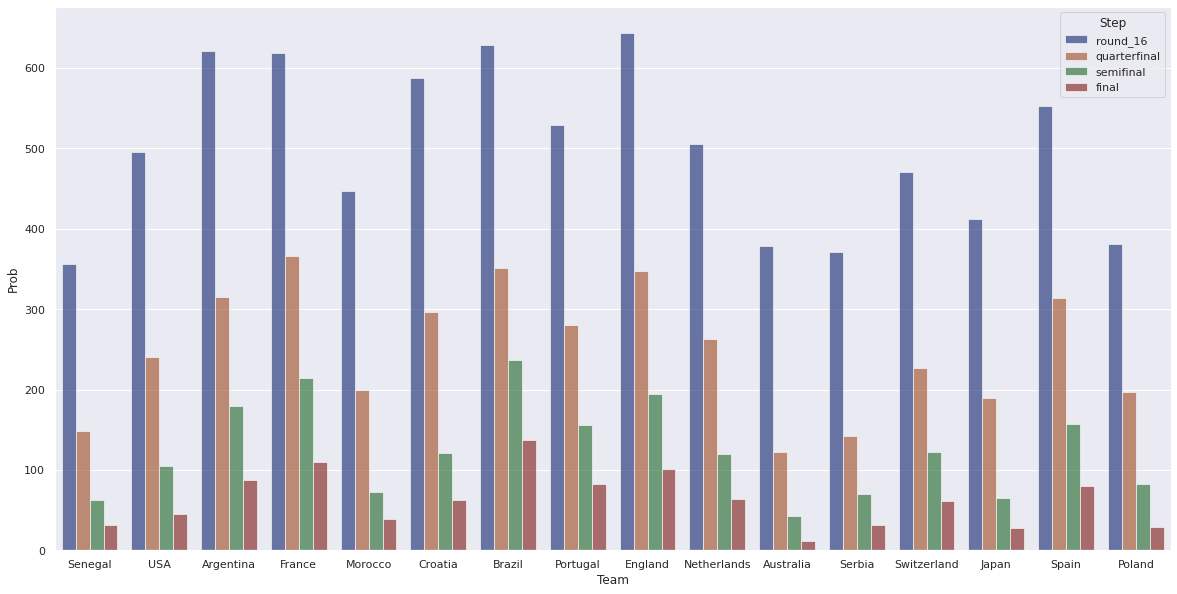

In [37]:
#Unir todos los datos en una sola vista
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})

# Dibujar un diagrama de barras anidado por equipo y paso
g = sns.barplot(data=df_results, x="Team",y='Prob', hue="Step", estimator=sum, palette="dark", alpha=.6)

##CONCLUSIONES

Los resultados de los partidos de fútbol son impredecibles: aunque el modelo ha utilizado datos estadísticos históricos para simular los resultados de los partidos, sigue habiendo una gran incertidumbre en el resultado final de cada partido. Esto se debe a que hay muchos factores impredecibles que pueden influir en el resultado, como lesiones de los jugadores, clima, errores arbitrales, entre otros.

La probabilidad de ganar el mundial es mayor para los equipos con mejor historial: como era de esperar, los equipos que han tenido más éxito en el pasado, como Brasil, Alemania, Francia y Argentina, tienen una mayor probabilidad de ganar el mundial según el modelo. 

La etapa de eliminación directa es la más impredecible: aunque la simulación ha dado como ganadores a equipos con un buen historial en la fase de grupos, la etapa de eliminación directa es mucho más difícil de predecir. Cualquier error o un buen desempeño de los oponentes puede resultar en la eliminación del equipo.

Finalmente, el modelo puede ser mejorado con datos más recientes: como el modelo ha sido entrenado con datos hasta 2021, podría ser mejorado utilizando datos más recientes y actualizados de los equipos. Además, el modelo podría incluir otros factores, como la forma de los jugadores y el estilo de juego, para hacer las simulaciones más precisas.